In [36]:
from sqlalchemy import create_engine
import pandas as pd

In [139]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "TH Sarabun New"

In [37]:
MYSQL_PASSWORD = ''DATABASE = 'mtc'

In [118]:
engine = create_engine('mysql+mysqlconnector://root:{}@localhost/{}'.format(MYSQL_PASSWORD, DATABASE))

In [119]:
member_df = pd.read_sql_table('member', con=engine)

In [120]:
member_df.head()

,mem_id,title_id,fname,lname,e_title,e_fname,e_lname,gender,persion_id,login_user,...,cpd_score60,mem_id_txt,office_type_id,position,addr_lastupdate,other_office_type,old_mem_id,begin_s_year,new_mem_status,mem_status_id
0,1.0,นาย,เดชา,ร่มไทรย์,Mr.,Decha,Romcai,None,12345,1,...,0.0,199947000001,NaN,None,NaT,None,NaN,None,None,1.0
1,2.0,นาย,ประสิทธิ์,ชนะรัตน์,Mr.,Prasit,Chanarat,None,3509901499470,3509901499470,...,0.0,199947000002,0.0,,NaT,-,NaN,None,None,1.0
2,3.0,นาย,ชวลิต,ทัศนสว่าง,Mr.,Chawarit,Tasanasawang,None,T003,as,...,0.0,209947000003,54.0,,NaT,,NaN,None,None,1.0
3,4.0,ร.ต.,ศิริ,ฉิมอ่อน,,,,None,#null,4,...,0.0,209947000004,0.0,,NaT,None,NaN,None,None,1.0
4,5.0,นางสาว,ศรีสิริ,ชาตะสิงห,,,,None,T0005,11,...,0.0,209947000005,NaN,None,NaT,None,NaN,None,None,2.0


In [11]:
member_addr_df = pd.read_sql_table('member_add', con=engine)

In [12]:
member_addr_df.loc[0]

add_id                            3
mem_id                        16348
add1                   ุ6 หมู่ที่ 9
moo                            None
soi                            None
road                           None
DISTRICT_ID                    5444
AMPHUR_ID                       605
PROVINCE_ID                      40
GEO_ID                         None
zipcode                       52130
country_code                    NaN
updt            2019-03-01 21:03:52
Name: 0, dtype: object

In [20]:
office_type_df = pd.read_sql_table('office_type', con=engine)

In [21]:
office_type_df.loc[0]

office_type_id             50
type_name         ยังไม่ทำงาน
sql_no                      1
Name: 0, dtype: object

In [22]:
office_type_df.head()

,office_type_id,type_name,sql_no
0,50,ยังไม่ทำงาน,1
1,2,หน่วยงานของรัฐสังกัด กระทรวงสาธารณสุข,2
2,3,หน่วยงานของรัฐ ไม่ได้สังกัดกระทรวงสาธารณสุข,3
3,4,มหาวิทยาลัยของรัฐ,4
4,5,มหาวิทยาลัยเอกชน,5


In [25]:
skill_table_df = pd.read_sql_table('skill_table', con=engine)

In [26]:
skill_table_df.loc[0]

skill_id               1
skill_name    โลหิตวิทยา
seq_no                 2
Name: 0, dtype: object

In [30]:
member_addr_df.loc[0]

add_id                            3
mem_id                        16348
add1                   ุ6 หมู่ที่ 9
moo                            None
soi                            None
road                           None
DISTRICT_ID                    5444
AMPHUR_ID                       605
PROVINCE_ID                      40
GEO_ID                         None
zipcode                       52130
country_code                    NaN
updt            2019-03-01 21:03:52
Name: 0, dtype: object

In [42]:
province_df = pd.read_sql_table('province', con=engine)

In [43]:
province_df.head()

,PROVINCE_ID,PROVINCE_CODE,PROVINCE_NAME,GEO_ID
0,1,10,กรุงเทพมหานคร,2
1,2,11,สมุทรปราการ,2
2,3,12,นนทบุรี,2
3,4,13,ปทุมธานี,2
4,5,14,พระนครศรีอยุธยา,2


In [47]:
cpd_work_df = pd.read_sql_table('cpd_work', con=engine)

In [49]:
province_df.columns

Index(['PROVINCE_ID', 'PROVINCE_CODE', 'PROVINCE_NAME', 'GEO_ID'], dtype='object')

In [69]:
member_office_df = pd.merge(member_df,office_type_df)
member_office_df = pd.merge(member_office_df, member_addr_df)
member_office_df = pd.merge(member_office_df, province_df, left_on='PROVINCE_ID', right_on='PROVINCE_ID')

In [70]:
member_office_df.columns

Index(['mem_id', 'title_id', 'fname', 'lname', 'e_title', 'e_fname', 'e_lname',
       'gender', 'persion_id', 'login_user', 'login_password', 'student_id',
       's_year', 'f_year', 'address_id_doc', 'begin_date', 'exp_date',
       'mem_status', 'edu_status', 'add_status', 'nation_code', 'passport_id',
       'office_name', 'mobilesms', 'tel_no_house', 'fax_no_house',
       'tel_no_office', 'fax_no_office', 'birthday', 'f_pnt_status',
       'pnt_status', 'user_id', 'updt', 'u_id_studet', 'pic_member',
       'email_member', 'mem_note', 'edu_level', 'u_name', 'mem_skill',
       'last_update', 'flow_status_id', 'cpd_1', 'exam_type_main',
       'doc_status', 'pic_card', 'pnt_req_date', 'cpd_score', 'cpd_score59',
       'cpd_score60', 'mem_id_txt', 'office_type_id', 'position',
       'addr_lastupdate', 'other_office_type', 'old_mem_id', 'begin_s_year',
       'new_mem_status', 'mem_status_id', 'type_name', 'sql_no', 'add_id',
       'add1', 'moo', 'soi', 'road', 'DISTRICT_ID', 'AM

In [72]:
member_office_df.groupby(['PROVINCE_NAME', 'type_name']).count()['mem_id']

PROVINCE_NAME     type_name                            
กระบี่            ธุรกิจส่วนตัว                             2
                  ประเภทหน่วยงาน อื่น ๆ                     1
                  ยังไม่ทำงาน                              16
กรุงเทพมหานคร     คลินิคเทคนิคการแพทย์                      3
                  ธุรกิจส่วนตัว                             4
                                                           ..
เพชรบูรณ์         ยังไม่ทำงาน                              19
เลย               ยังไม่ทำงาน                               6
                  หน่วยงานของรัฐสังกัด กระทรวงสาธารณสุข     3
แพร่              มหาวิทยาลัยของรัฐ                         1
                  ยังไม่ทำงาน                              16
Name: mem_id, Length: 184, dtype: int64

In [79]:
member_office_df.groupby(['type_name']).count()['mem_id']

type_name
คลินิคเทคนิคการแพทย์                             21
ธุรกิจส่วนตัว                                    35
บริษัทจำหน่ายผลิตภัณฑ์ด้านการแพทย์               37
บริษัทบริการสุขภาพด้านการแพทย์                   26
ประเภทหน่วยงาน อื่น ๆ                            28
มหาวิทยาลัยของรัฐ                                20
มหาวิทยาลัยเอกชน                                  3
ยังไม่ทำงาน                                    1726
ศึกษาต่อในประเทศ                                  4
หน่วยงานของรัฐ ไม่ได้สังกัดกระทรวงสาธารณสุข      10
หน่วยงานของรัฐสังกัด กระทรวงสาธารณสุข            61
โรงพยาบาลเอกชน                                   23
Name: mem_id, dtype: int64

In [84]:
member_office_df[pd.isna(member_office_df.PROVINCE_ID)]

,mem_id,title_id,fname,lname,e_title,e_fname,e_lname,gender,persion_id,login_user,...,road,DISTRICT_ID,AMPHUR_ID,PROVINCE_ID,GEO_ID_x,zipcode,country_code,PROVINCE_CODE,PROVINCE_NAME,GEO_ID_y


In [83]:
len(member_office_df.office_type_id)

1994

In [85]:
len(member_df)

20616

In [86]:
len(member_addr_df)

58693

In [91]:
member_ = pd.merge(member_df, member_addr_df, left_on='mem_id', right_on='mem_id')

In [92]:
member_office_df = pd.merge(member_, office_type_df, left_on='office_type_id', right_on='office_type_id')

In [93]:
len(member_office_df)

43440

In [97]:
member_office_province_df = pd.merge(member_office_df, province_df, left_on='PROVINCE_ID', right_on='PROVINCE_ID')

In [101]:
member_office_province_df[member_office_province_df.PROVINCE_ID==1].groupby(['PROVINCE_NAME','type_name']).count()['mem_id']

PROVINCE_NAME     type_name                                  
กรุงเทพมหานคร     คลินิคเทคนิคการแพทย์                            247
                  ธุรกิจส่วนตัว                                   186
                  บริษัทจำหน่ายผลิตภัณฑ์ด้านการแพทย์             1460
                  บริษัทบริการสุขภาพด้านการแพทย์                  576
                  ประเภทหน่วยงาน อื่น ๆ                           773
                  มหาวิทยาลัยของรัฐ                              1233
                  มหาวิทยาลัยเอกชน                                 69
                  ยังไม่ทำงาน                                     793
                  ศึกษาต่อต่างประเทศ                               23
                  ศึกษาต่อในประเทศ                                 92
                  หน่วยงานของรัฐ ไม่ได้สังกัดกระทรวงสาธารณสุข    1113
                  หน่วยงานของรัฐสังกัด กระทรวงสาธารณสุข           562
                  อยู่ต่างประเทศ                                   22
                  เกษียณอายุ

In [106]:
member_office_province_df[member_office_province_df.PROVINCE_ID==1].groupby(['PROVINCE_NAME','type_name']).count()['mem_id'].to_excel('office_type_bkk_mt.xlsx')

In [115]:
len(member_df[~pd.isna(member_df.office_type_id)])/len(member_df)*100

75.96526969344198

In [112]:
len(member_df)

20616

In [116]:
member_df.columns

Index(['mem_id', 'title_id', 'fname', 'lname', 'e_title', 'e_fname', 'e_lname',
       'gender', 'persion_id', 'login_user', 'login_password', 'student_id',
       's_year', 'f_year', 'address_id_doc', 'begin_date', 'exp_date',
       'mem_status', 'edu_status', 'add_status', 'nation_code', 'passport_id',
       'office_name', 'mobilesms', 'tel_no_house', 'fax_no_house',
       'tel_no_office', 'fax_no_office', 'birthday', 'f_pnt_status',
       'pnt_status', 'user_id', 'updt', 'u_id_studet', 'pic_member',
       'email_member', 'mem_note', 'edu_level', 'u_name', 'mem_skill',
       'last_update', 'flow_status_id', 'cpd_1', 'exam_type_main',
       'doc_status', 'pic_card', 'pnt_req_date', 'cpd_score', 'cpd_score59',
       'cpd_score60', 'mem_id_txt', 'office_type_id', 'position',
       'addr_lastupdate', 'other_office_type', 'old_mem_id', 'begin_s_year',
       'new_mem_status', 'mem_status_id'],
      dtype='object')

In [121]:
member_skill_df = pd.read_sql_table('member_skill', con=engine)

In [123]:
skill_df = pd.read_sql_table('skill_table', con=engine)

In [130]:
joined_member_skill = pd.merge(member_skill_df,skill_df, left_on='skill_id', right_on='skill_id')
joined_member_skill = pd.merge(joined_member_skill, member_df, left_on='mem_id', right_on='mem_id')

In [132]:
joined_member_skill[joined_member_skill.skill_id==17]

,mem_id,skill_id,skill_txt,mem_skill_x,skill_name,seq_no,title_id,fname,lname,e_title,...,cpd_score60,mem_id_txt,office_type_id,position,addr_lastupdate,other_office_type,old_mem_id,begin_s_year,new_mem_status,mem_status_id
7,5449.0,17.0,None,None,เทคนิคการแพทยศาสตร์ศึกษา,16.0,นางสาว,พรสุรี,พงษ์สุชาติ,Miss,...,0.0,459947005449,11.0,Medical Laboratory Technologist,2019-09-19,บริษัทเอกชน,NaN,None,None,1.0
1774,7727.0,17.0,None,None,เทคนิคการแพทยศาสตร์ศึกษา,16.0,นางสาว,ปัทมาพร,พงภักดิ์ขวัญ,Miss,...,0.0,499947007727,6.0,ผู้จัดการสาขา,2018-04-18,,NaN,None,None,1.0
2473,6255.0,17.0,None,None,เทคนิคการแพทยศาสตร์ศึกษา,16.0,นางสาว,วชิรยา,ปาทาน,Miss,...,0.0,469947006255,6.0,หัวหน้าห้องปฏิบัติการ,2020-06-17,,NaN,None,None,1.0
7077,690.0,17.0,None,None,เทคนิคการแพทยศาสตร์ศึกษา,16.0,นาย,ยุทธนา,หมั่นดี,Asst.Prof.MT.Dr.,...,0.0,259947000690,4.0,คณบดี,2020-03-08,คณะสหเวชศาสตร์,NaN,None,None,1.0
10505,7524.0,17.0,None,None,เทคนิคการแพทยศาสตร์ศึกษา,16.0,นางสาว,ยุวดี,อยู่สุข,Miss,...,0.0,489947007524,6.0,นักเทคนิคการแพทย์,2020-06-23,รพ.,NaN,None,None,1.0


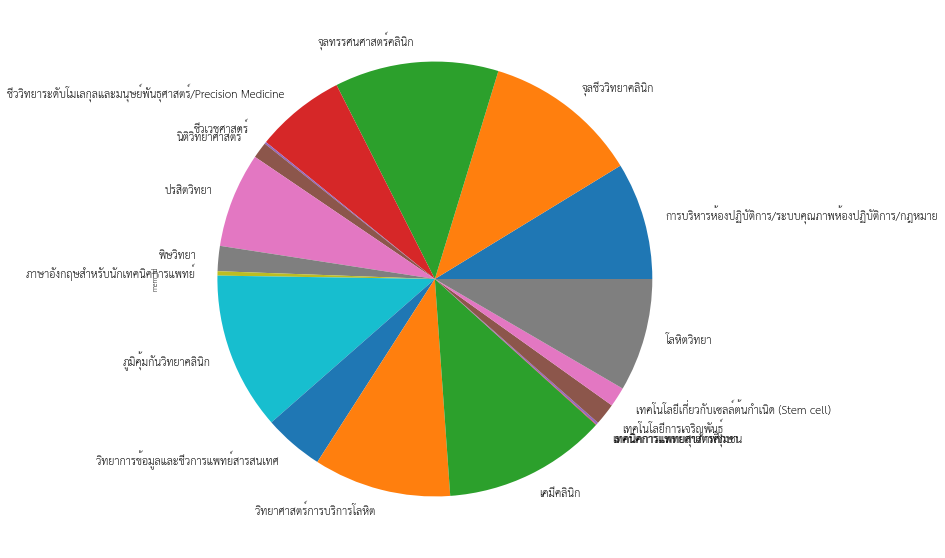

In [143]:
joined_member_skill.groupby('skill_name').count()['mem_id'].plot(kind='pie', figsize=(10,10), fontsize=16)

In [157]:
def check_null_or_empty_string(x):
    if pd.isna(x):
        return True
    else:
        if isinstance(x, str):
            return x.strip() == ''

In [159]:
member_tbl_avail = (len(member_df)-member_df.applymap(check_null_or_empty_string).sum())/len(member_df)*100

In [160]:
member_tbl_avail.to_excel('member_tbl_avail.xlsx')

In [173]:
member_df[pd.isna(member_df['gender'])].groupby(['title_id']).count()['mem_id']

title_id
rพลตรี ม.ล.         1
 นางสาว             2
จ.ส.อ.              1
น.ต.                1
น.ท.                1
                   ..
เรืออากาศเอกหญิง    2
เรืออากาศโท         2
เรืออากาศโทหญิง     3
เรือเอก             1
เรือโท              1
Name: mem_id, Length: 78, dtype: int64